### Standard Imports

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms , models
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Examine the data

In [2]:
import os
from PIL import Image
from IPython.display import display

# Filter harmless warnings
import warnings
warnings.filterwarnings("ignore")

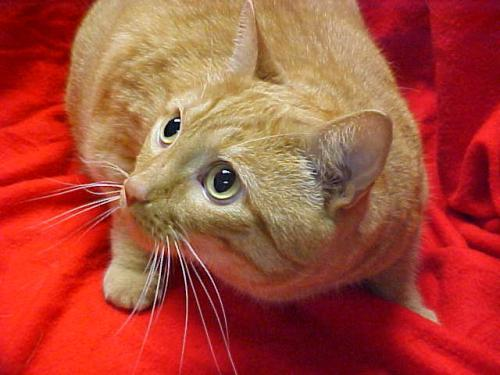

In [3]:
with Image.open('C:/Users/iamka/Documents/#01 Codes/ML projects/#4CatDogs/CATS_DOGS/train/CAT/18.jpg') as im:
    display(im)

Create a list of image filnames

In [4]:
path = 'C:/Users/iamka/Documents/#01 Codes/ML projects/#4CatDogs/CATS_DOGS/'
img_names = []

for folder, subfolders, filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder+'\\'+img)
        
print('Images: ',len(img_names))

Images:  24996


In [5]:
img_names[2]

'C:/Users/iamka/Documents/#01 Codes/ML projects/#4CatDogs/CATS_DOGS/test\\CAT\\10000.jpg'

Creating a DF of image_sizes W*H

In [6]:
# Start by creating a list
img_sizes = []
rejected = []

for item in img_names:
    try:
        with Image.open(item) as img:
            img_sizes.append(img.size)
    except:
        rejected.append(item)
        
print(f'Images:  {len(img_sizes)}')
print(f'Rejects: {len(rejected)}')

Images:  24994
Rejects: 2


In [7]:
# Convert the list to a DataFrame
df = pd.DataFrame(img_sizes)

df.head()

,0,1
0,431,360
1,500,375
2,500,471
3,500,375
4,320,240


In [8]:
# Run summary statistics on image widths
df[0].describe()

count    24994.000000
mean       404.493518
std        108.941802
min         42.000000
25%        323.000000
50%        448.000000
75%        500.000000
max        500.000000
Name: 0, dtype: float64

In [9]:
# Run summary statistics on image heights
df[1].describe()

count    24994.000000
mean       361.037129
std         96.936811
min         33.000000
25%        302.000000
50%        375.000000
75%        421.000000
max        500.000000
Name: 1, dtype: float64

### Image Processing 

(216, 348)


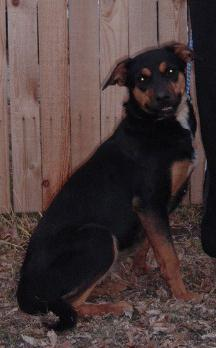

In [10]:
dog = Image.open('C:/Users/iamka/Documents/#01 Codes/ML projects/#4CatDogs/CATS_DOGS/train/DOG/18.jpg')
print(dog.size)
display(dog)

In [11]:
dog.getpixel((0,0))  # r,g,b  (0-255)

(140, 113, 106)

The pixel at position [0,0] (upper left) of the source image has an rgb value of (140, 113, 106)

In [12]:
transform = transforms.Compose([
    transforms.ToTensor()
])

im = transform(dog)

print(type(im))
print(im.shape)

<class 'torch.Tensor'>
torch.Size([3, 348, 216])


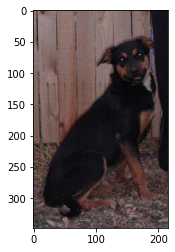

In [13]:
# b/c matplotlib need data in formate (348,216,3)
# (1,2,0) basically swapping the indeces

plt.imshow(np.transpose(im.numpy(),(1,2,0)));

In [14]:
im

tensor([[[0.5490, 0.6353, 0.5333,  ..., 0.0824, 0.0824, 0.0824],
         [0.5490, 0.6392, 0.5451,  ..., 0.0745, 0.0784, 0.0784],
         [0.5412, 0.6392, 0.5608,  ..., 0.0706, 0.0745, 0.0745],
         ...,
         [0.3294, 0.3412, 0.3490,  ..., 0.2784, 0.3529, 0.3647],
         [0.4039, 0.4471, 0.4745,  ..., 0.2706, 0.2902, 0.2667],
         [0.4353, 0.4863, 0.5137,  ..., 0.5176, 0.5843, 0.5804]],

        [[0.4431, 0.5294, 0.4353,  ..., 0.0784, 0.0784, 0.0784],
         [0.4431, 0.5333, 0.4471,  ..., 0.0706, 0.0745, 0.0745],
         [0.4353, 0.5333, 0.4627,  ..., 0.0667, 0.0706, 0.0706],
         ...,
         [0.2471, 0.2667, 0.2784,  ..., 0.2235, 0.2980, 0.3098],
         [0.3294, 0.3725, 0.4039,  ..., 0.2275, 0.2471, 0.2235],
         [0.3608, 0.4118, 0.4431,  ..., 0.4745, 0.5412, 0.5373]],

        [[0.4157, 0.5020, 0.4157,  ..., 0.1020, 0.1020, 0.1020],
         [0.4157, 0.5059, 0.4275,  ..., 0.0941, 0.0980, 0.0980],
         [0.4078, 0.5059, 0.4431,  ..., 0.0902, 0.0941, 0.

<class 'torch.Tensor'>
torch.Size([3, 150, 150])


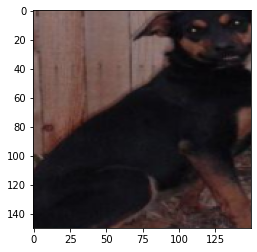

In [15]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.CenterCrop(150),
    transforms.ToTensor(),
    
])

im = transform(dog)

print(type(im))
print(im.shape)


plt.imshow(np.transpose(im.numpy(),(1,2,0)));

<class 'torch.Tensor'>
torch.Size([3, 224, 224])


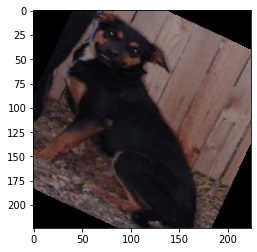

In [16]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
#     transforms.CenterCrop(150),
    transforms.RandomHorizontalFlip(p=1),  # p is probability
    transforms.RandomRotation(35),
    transforms.ToTensor(),
    
])

im = transform(dog)

print(type(im))
print(im.shape)


plt.imshow(np.transpose(im.numpy(),(1,2,0)));

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 348, 216])


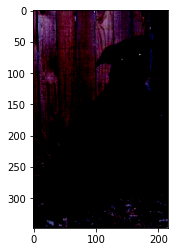

In [17]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

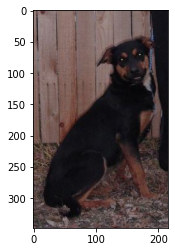

In [18]:
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(), (1, 2, 0)));

## Define transforms

In [19]:
train_transform = transforms.Compose([
        transforms.RandomRotation(10),      # rotate +/- 10 degrees
        transforms.RandomHorizontalFlip(),  # reverse 50% of images
        transforms.Resize(224),             
        transforms.CenterCrop(224),         
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

test_transform = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

## Prepare train and test sets, loaders

In [20]:
root = 'C:/Users/iamka/Documents/#01 Codes/ML projects/#4CatDogs/CATS_DOGS/'

train_data = datasets.ImageFolder(os.path.join(root, 'train'), transform=train_transform)
test_data = datasets.ImageFolder(os.path.join(root, 'test'), transform=test_transform)

torch.manual_seed(42)
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=True)

class_names = train_data.classes

print(class_names)
print(f'Training images available: {len(train_data)}')
print(f'Testing images available:  {len(test_data)}')

['CAT', 'DOG']
Training images available: 18743
Testing images available:  6251


so let's display a batch of images

Label: [1 1 0 0 1 1 0 1 0 0]
Class: DOG DOG CAT CAT DOG DOG CAT DOG CAT CAT


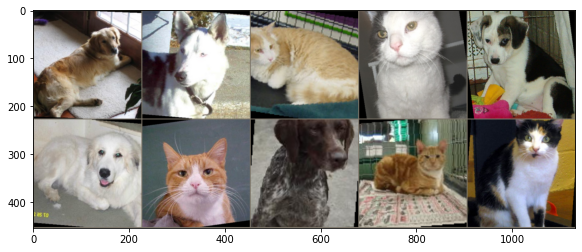

In [21]:
# Grab the first batch of 10 images
for images,labels in train_loader: 
    break

# Print the labels
print('Label:', labels.numpy())
print('Class:', *np.array([class_names[i] for i in labels]))

im = make_grid(images, nrow=5)  # the default nrow is 8

# Inverse normalize the images
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)

# Print the images
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(), (1, 2, 0)));

### define  a CNN model

In [22]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, 1)  # 3 color chanel , 6 filter , 
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(54*54*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 54*54*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [23]:
(((224-2)/2)-2)/2

54.5

In [24]:
torch.manual_seed(101)
CNNmodel = ConvolutionalNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(CNNmodel.parameters(), lr=0.001)
CNNmodel

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=46656, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)

In [25]:
for p in CNNmodel.parameters():
    print(p.numel())
    

162
6
864
16
5598720
120
10080
84
168
2


train this model 

In [27]:
import time
start_time = time.time()


epochs = 10


max_trn_batch = 800
max_tst_batch = 300

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        
        b+=1
        
        # Apply the model
        y_pred = CNNmodel(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4}   loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = CNNmodel(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
    
    
    
    
total_time = time.time() - start_time  

print(f'Total time for training this model is : {total_time/60} mins')

epoch:  0  batch:  200   loss: 0.58685458  accuracy:  65.500%
epoch:  0  batch:  400   loss: 0.63721395  accuracy:  67.250%
epoch:  0  batch:  600   loss: 0.65873539  accuracy:  67.700%
epoch:  0  batch:  800   loss: 0.84100628  accuracy:  68.438%
epoch:  0  batch: 1000   loss: 0.93677986  accuracy:  69.480%
epoch:  0  batch: 1200   loss: 0.61906725  accuracy:  70.167%
epoch:  0  batch: 1400   loss: 0.40378103  accuracy:  70.857%
epoch:  0  batch: 1600   loss: 0.74142134  accuracy:  71.088%
epoch:  0  batch: 1800   loss: 0.36915272  accuracy:  71.511%
epoch:  1  batch:  200   loss: 0.32454184  accuracy:  77.050%
epoch:  1  batch:  400   loss: 0.49837017  accuracy:  76.775%
epoch:  1  batch:  600   loss: 0.36708766  accuracy:  76.767%
epoch:  1  batch:  800   loss: 0.59191042  accuracy:  76.550%
epoch:  1  batch: 1000   loss: 0.33272481  accuracy:  76.920%
epoch:  1  batch: 1200   loss: 0.42414886  accuracy:  76.850%
epoch:  1  batch: 1400   loss: 0.46368235  accuracy:  76.936%
epoch:  

In [28]:
torch.save(CNNmodel.state_dict(),'DogCat10epochModel.pt')

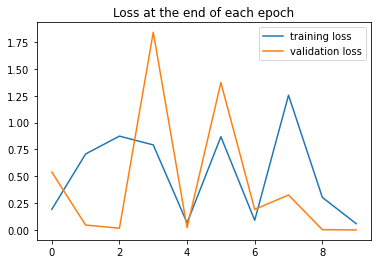

In [29]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

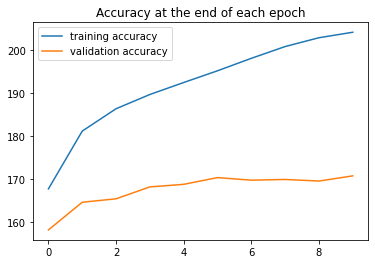

In [30]:
plt.plot([t/80 for t in train_correct], label='training accuracy')
plt.plot([t/30 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

## Using a pretrained model

In [40]:
AlexNetmodel = models.alexnet(pretrained=True)
AlexNetmodel

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [41]:
for param in AlexNetmodel.parameters():
    param.requires_grad = False

#### modify classifier




In [42]:
torch.manual_seed(42)
AlexNetmodel.classifier = nn.Sequential(nn.Linear(9216, 1024),
                                 nn.ReLU(),
                                 nn.Dropout(0.4),
                                 nn.Linear(1024, 2),
                                 nn.LogSoftmax(dim=1))
AlexNetmodel

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, 

In [43]:
for param in AlexNetmodel.parameters():
    print(param.numel())

23232
64
307200
192
663552
384
884736
256
589824
256
9437184
1024
2048
2


In [44]:
### define loss fxn and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(AlexNetmodel.classifier.parameters(), lr=0.001)

#### Train Model

In [45]:
import time
start_time = time.time()

epochs = 1

max_trn_batch = 800
max_tst_batch = 300

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        if b == max_trn_batch:
            break
        b+=1
        
        # Apply the model
        y_pred = AlexNetmodel(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4}  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            if b == max_tst_batch:
                break

            # Apply the model
            y_val = AlexNetmodel(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

print(f'\nDuration: {time.time() - start_time:.0f} seconds') 

epoch:  0  batch:  200  loss: 2.04397702  accuracy:  89.550%
epoch:  0  batch:  400  loss: 0.30947351  accuracy:  91.150%
epoch:  0  batch:  600  loss: 0.11741922  accuracy:  91.833%
epoch:  0  batch:  800  loss: 0.01325765  accuracy:  92.312%

Duration: 173 seconds


In [46]:
print(test_correct)

[tensor(2809)]


In [47]:
print(f'Test accuracy: {test_correct[-1].item()*100/3000:.3f}%')

Test accuracy: 93.633%


pass a image on both model to test 

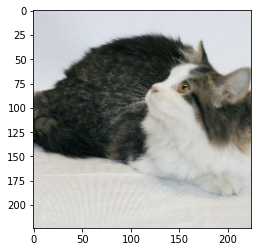

In [48]:
x = 2019
im = inv_normalize(test_data[x][0])
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [49]:
# CNN Model Prediction:

CNNmodel.eval()
with torch.no_grad():
    new_pred = CNNmodel(test_data[x][0].view(1,3,224,224)).argmax()
print(f'Predicted value: {new_pred.item()} {class_names[new_pred.item()]}')

Predicted value: 0 CAT


In [50]:
# AlexNet Model Prediction:

AlexNetmodel.eval()
with torch.no_grad():
    new_pred = AlexNetmodel(test_data[x][0].view(1,3,224,224)).argmax()
print(f'Predicted value: {new_pred.item()} {class_names[new_pred.item()]}')

Predicted value: 0 CAT
